# Basics of Cluster Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('3.01. Country clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


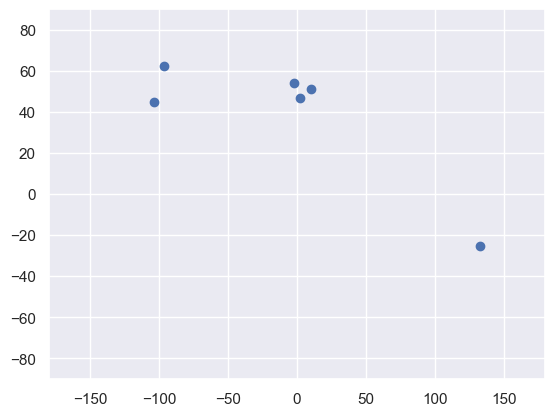

In [4]:
# We want to cluster based on geographical location, hence we use the longitudes and langitudes
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

In [5]:
x = data.iloc[:, 1:3]   # Take in all the rows, splice out the first and fourth columns
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [6]:
kmeans = KMeans(3)  # The parameter is 'k', the number of clusters

In [7]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [8]:
identifyClusters = kmeans.fit_predict(x)
identifyClusters

array([1, 1, 2, 2, 2, 0], dtype=int32)

In [9]:
dataClusters = data.copy()
dataClusters['Cluster'] = identifyClusters
dataClusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,2
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,0


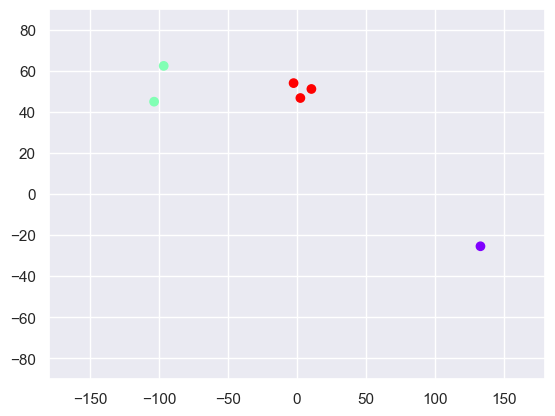

In [10]:
# The 'c' parameter is for colour, and we can set the colour of the plot points based on a variable
# The 'cmap' parameter is for the actual colour of the plot points.
plt.scatter(dataClusters['Longitude'], dataClusters['Latitude'], c=dataClusters['Cluster'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

## WCSS And the Elbow Method: Choosing the right number of clusters

In [11]:
kmeans.inertia_

288.1052333333333

In [12]:
wcss = []
for i in range(1, 7):   # 6 total observations, or 6 rows of data
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [13]:
wcss

[42601.91356666667,
 17243.964500000002,
 288.1052333333333,
 111.91233333333332,
 38.50624999999999,
 0.0]

Text(0, 0.5, 'Within-cluster Sum Of Squares')

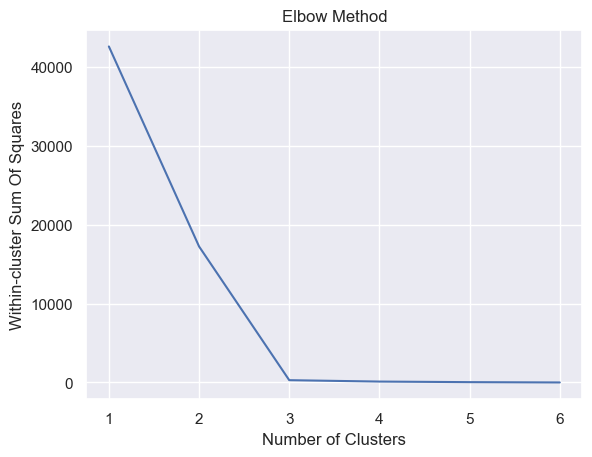

In [14]:
number_clusters = range(1, 7)
plt.plot(number_clusters, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum Of Squares')

As such, we can see that 3 is optimal for the number of clusters to use.